<b><font color= blue size =4>Lead Scoring - Case Study</font></b><br>
<b><font color = maroon>Problem Statement</font></b><br>
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<b><font color = maroon>Goals of Case Study</font></b><br>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


<b><font color= blue size =4>Step 1 : Importing the data and liberaries</font></b>

In [2]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing dataset to csv

df_leads=pd.read_csv("/content/Leads.csv",on_bad_lines='skip')


<b><font color= blue size =4>Step 2: Lets inspect the dataframe </font></b>

In [5]:
#top5 rows of dataframe
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#dimention of the dataframe
df_leads.shape

(9240, 37)

In [7]:
#Statstical aspects
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Let's check out info 
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Here, We have seen some categorical variable so for them we need to create dummy variable. Also we need to treat null variable accordingly in further steps

In [9]:
#Lets check for duplicates
sum(df_leads.duplicated(subset = 'Prospect ID')) == 0


True

In [10]:
#check for duplicates
sum(df_leads.duplicated(subset = 'Lead Number')) == 0

True

#### No duplicate values exist in 'Prospect ID' and 'Lead Number'

## <font color=purple>Exploratory Data Analysis</font>

# <b><font color= blue size =4>Step 3: Data Cleaning</font></b>

<b><font color= maroon size =3>3.1 Lets find out Missing Values</font></b>

In [11]:
#dropping Lead Number and Prospect ID since they have all unique values

df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

####We can see on some places there is a level 'Select' which means the customen has not selected anything. Hense we need to convert them into NAN, as there are of no use

In [12]:
#Replacing 'Select' values with Nan
df_leads=df_leads.replace("Select", np.nan)

In [13]:
#Checking for count of missing values
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
#Lets check percentage of null values in each column

round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### We will drop the colomns which have missing value more then 30

<b><font color= maroon size =3>3.2 Dropping Columns with Missing Values >=30%</font></b>

In [15]:
#Drop all the columns with more than 45% missing values
cols=df_leads.columns

for i in cols:
    if((100*(df_leads[i].isnull().sum()/len(df_leads.index))) >= 30):
        df_leads.drop(i, 1, inplace = True)

In [16]:


round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

<b><font color= maroon size =3>3.3 Categorical Attributes Analysis: </font></b>
 

<b><font color= green size =3>Imbalanced Variables</font></b>

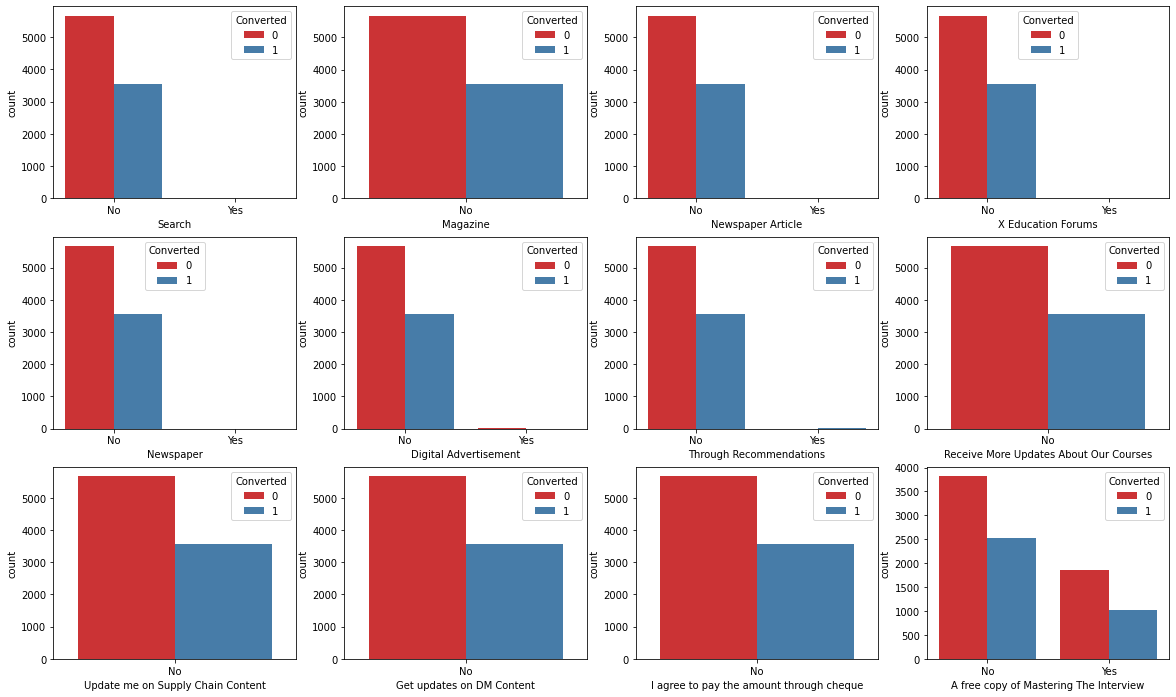

In [17]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df_leads, ax = axs[0,0],palette = 'Set1')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df_leads, ax = axs[1,2],palette = 'Set1')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df_leads, ax = axs[1,3],palette = 'Set1')
sns.countplot(x = "Magazine", hue = "Converted", data = df_leads, ax = axs[0,1],palette = 'Set1')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df_leads, ax = axs[2,1],palette = 'Set1')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df_leads, ax = axs[2,2],palette = 'Set1')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_leads, ax = axs[2,3],palette = 'Set1')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_leads, ax = axs[0,2],palette = 'Set1')
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_leads, ax = axs[0,3],palette = 'Set1')
sns.countplot(x = "Newspaper", hue = "Converted", data = df_leads, ax = axs[1,0],palette = 'Set1')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_leads, ax = axs[1,1],palette = 'Set1')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df_leads, ax = axs[2,0],palette = 'Set1')
plt.show()

In [18]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

<b><font color= green size =3> Lead Source</font></b>

In [19]:
#checking value counts of Lead Source column

df_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### We will impute the missing values with label 'Google', As Google is having highest number of occurences

In [20]:
#replacing Nan Value with Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace(np.nan,'Google')

#As 'Lead Source' is having same label name 'Google' but in different format i.e 'google', 
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google','Google')


In [21]:
#Lets combine low frequency values to 'Others'

df_leads['Lead Source'] = df_leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

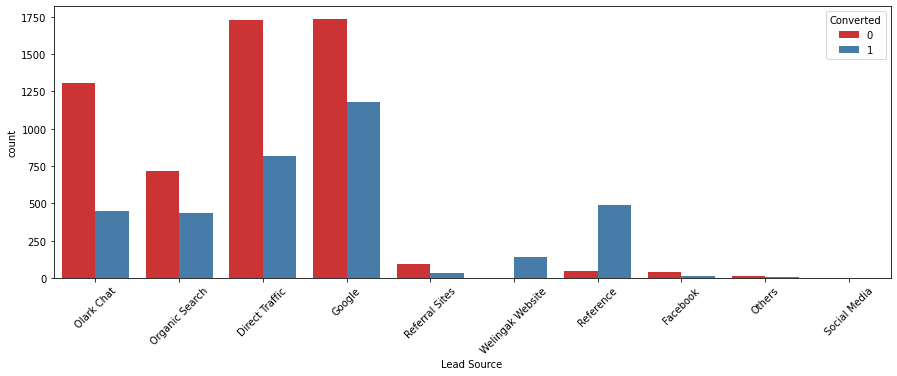

In [22]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =df_leads , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<b><font size= 3> Inference </font></b><br>
<ul><li>Google and Direct Traffic are generating Maximum leads</li>
    <li>There is high Conversion rate of Reference leads and Welinkgak Website</li>
    </ul> 

<b><font color= green size =3> Lets check for the countryCountry</font></b>

In [23]:
#checking value counts of Country column

df_leads['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Lets convert NaN to the value not provided by the customer


In [24]:
df_leads['Country'] = df_leads['Country'].replace(np.nan,'not provided')

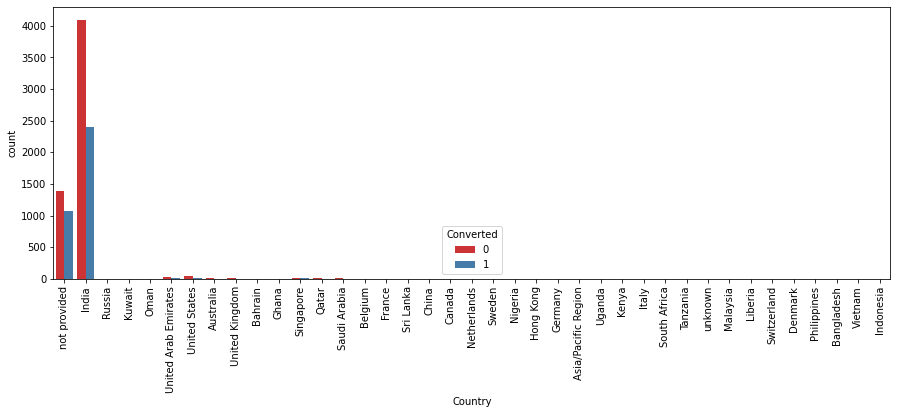

In [25]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =df_leads , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<b><font size= 3> Inference </font></b><br>As we can see that the most of the data is from India for from value is not provide. Hence this country column is of no use, so we are droping this column

In [26]:
#drop country
cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

<b><font color= green size =3> Lets check for the column 'What is your current occupation'</font></b>

In [27]:
#checking value counts of 'What is your current occupation' column
df_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

####  We can replace Null value with value is not cprovided


In [28]:

df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Not provided')

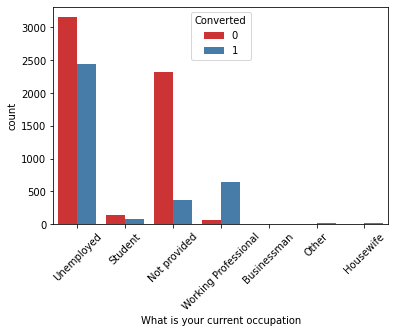

In [29]:


s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = df_leads , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


<b><font size= 3> Inference </font></b><br>
<ul><li>most of the leads are generated by the students and more then 60% are converted.</li>
<li>convertion rate for the working professional is very high so we need to focus on them</li></ul>

<b><font color= green size =3> Lets check on What matters most to you in choosing a course</font></b>

In [30]:

df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Clearly seen that null values in the this column can be imputed by 'Better Career Prospects' as it have the highest weightage.

In [31]:
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

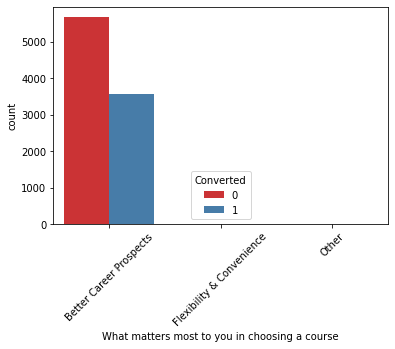

In [32]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = df_leads , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<b><font size= 3> Inference </font></b><br> There is no scope for others and flexibility & convenience hence we should drop them.


In [33]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

<b><font color= green size =3>Lets check for Last Activity</font></b>

In [34]:

df_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Missing Null can be imputed with mode value "Email Opened"

In [35]:
#Lets combine rest of the Activity into others
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [36]:
  #replacing Nan Values with mode value "Email Opened"

df_leads['Last Activity'] = df_leads['Last Activity'].replace(np.nan,'Email Opened')


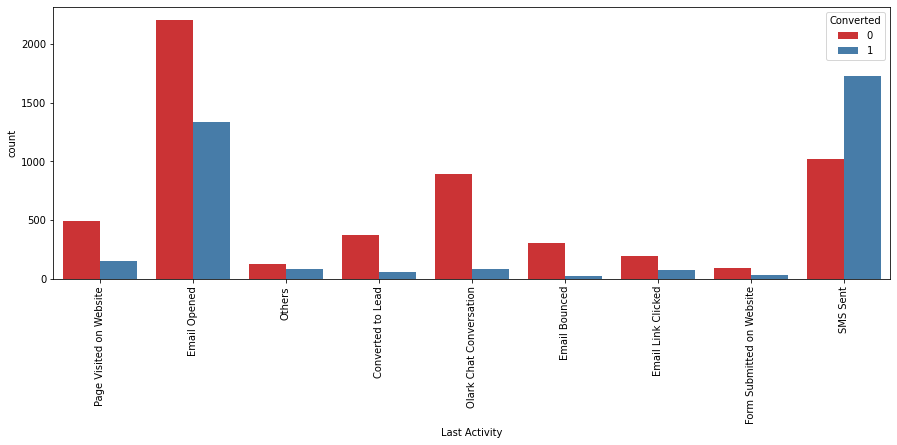

In [37]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = df_leads , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<b><font size= 3> Inference </font></b><br><ul><li>Maximum leads are from email opened.</li>
    <li> the highest coversion rate is of SMS send.</li> 

In [38]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [39]:
#Check the Null Values in All Columns after imputation:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [40]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
df_leads = df_leads.dropna()

In [41]:
df_leads.shape

(9103, 25)

In [42]:
#Checking percentage of Null Values 
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

<b><font color= green size =3>Lets check for Lead Origin</font></b>

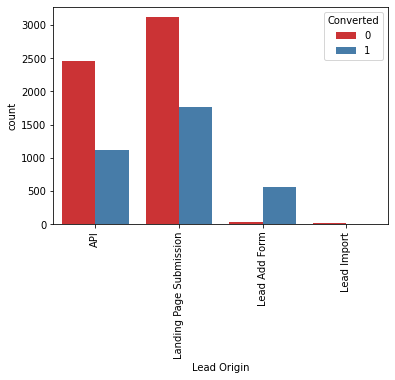

In [43]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = df_leads , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<b><font color= green size =3>Lets check for Do Not Email & Do Not Call</font></b>

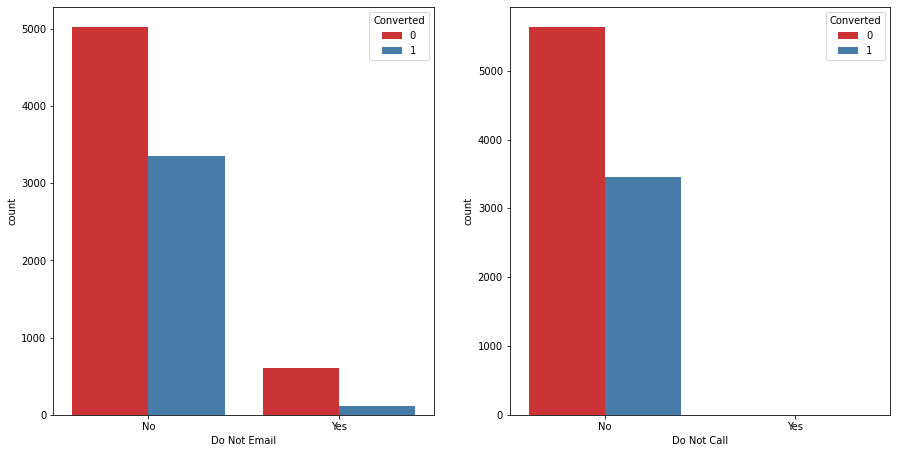

In [44]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_leads, ax = axs[0],palette = 'Set1')
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_leads, ax = axs[1],palette = 'Set1')
plt.show()

#### We can drop do not call as there is no yes

In [45]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')


cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

<b><font color= green size =3>Lets check for Last Notable Activity</font></b>

In [46]:

df_leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [47]:
#tLets merge the low frequence columns as others

df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

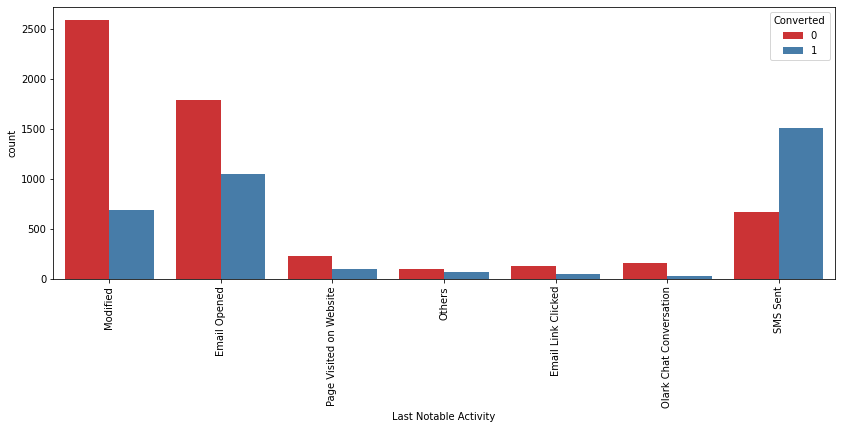

In [48]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_leads , palette = 'Set1')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

<b><font size= 3> Inference </font></b><br><ul><li> Maximum leads are generated having last activity as Email opened </li>
    <li> highest conversion rate is from SMS Sent.</li> 

In [49]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [50]:

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [51]:
#dropping columns
leads_final = df_leads.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 898.1+ KB


In [52]:
#checking top 5 rows
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


### <font color =blue>3.4 Numerical Attributes Analysis:</font>

<b><font color= green size =3>Lets check Converted</font></b>

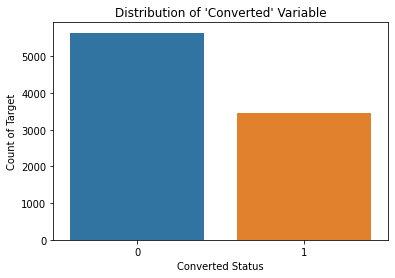

In [53]:
#Converted is the target variable,
# Indicates whether a lead has been successfully converted (1) or not (0).

sns.countplot(leads_final.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [54]:
# Lets figure out conversion rate
Converted = (sum(leads_final['Converted'])/len(leads_final['Converted'].index))*100
Converted

38.02043282434362

#### Currently, lead Conversion rate is 38% aprroximately only 

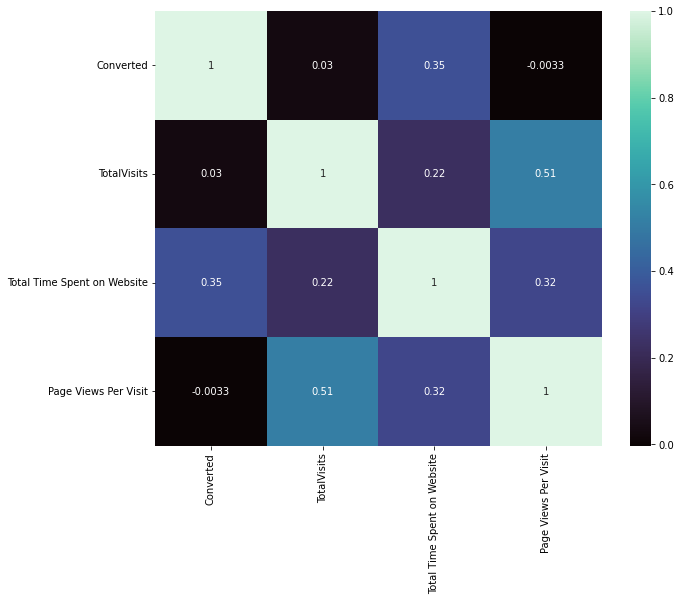

In [55]:
#Checking correlations of numeric values

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_final.corr(), cmap="mako", annot=True)
plt.show()

<b><font color= green size =3>Lets check Total Visits</font></b>

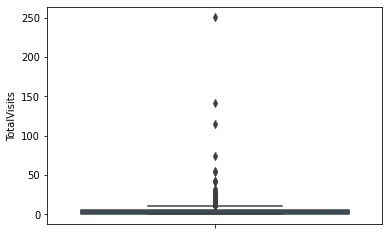

In [56]:

sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

#### there are many outliners

In [57]:
#checking percentile values for "Total Visits"

leads_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

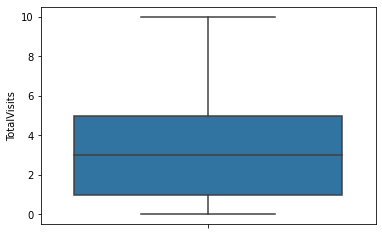

In [58]:
#capping the outliers to 95% value for analysis

percentiles = leads_final['TotalVisits'].quantile([0.05,0.95]).values
leads_final['TotalVisits'][leads_final['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_final['TotalVisits'][leads_final['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

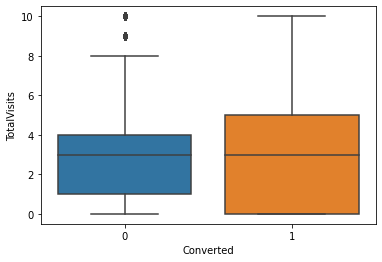

In [59]:
# Lets check for 0 and 1
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_final)
plt.show()

<b><font size= 3> Inference </font></b><br> Nothing can be said on this variable as the meadium is same for both the cases.

<b><font color= green size =3>Lets check for Total time spent on website</font></b>

In [60]:
#checking with boxplot

leads_final['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

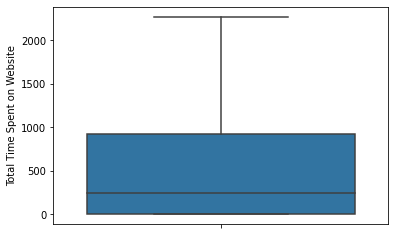

In [61]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads_final['Total Time Spent on Website'])
plt.show()

#### There is no outliners so no need to remove them.

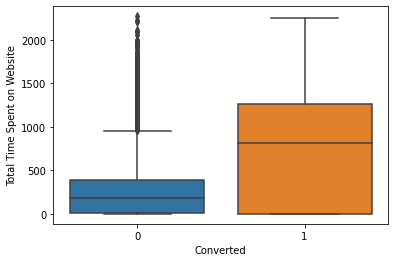

In [62]:
# Visualizing by boxplot 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_final)
plt.show()

<b><font size= 3> Inference </font></b><br> As we can see that spending more time on website are more likely to covert.
Hence this need more encourgement.

<b><font color= green size =3>Lets check for Page views per visit</font></b>

In [63]:
leads_final['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

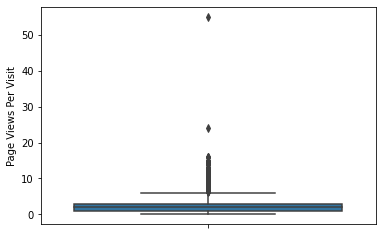

In [64]:

sns.boxplot(y =leads_final['Page Views Per Visit'])
plt.show()

#### there are many outliners

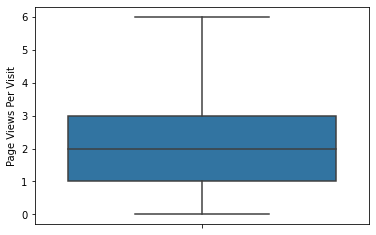

In [65]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads_final['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_final['Page Views Per Visit'][leads_final['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_final['Page Views Per Visit'][leads_final['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_final['Page Views Per Visit'])
plt.show()

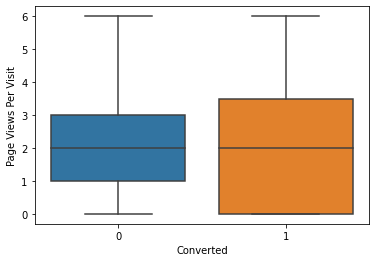

In [66]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_final)
plt.show()

<b><font size= 3>Inference</font></b><br> 

<ul><li>As meadium is same for both 0 and 1, we can not decide.</li>
<li>Nothing conclusive can be said on the basis of Page Views Per Visit.</li></ul>

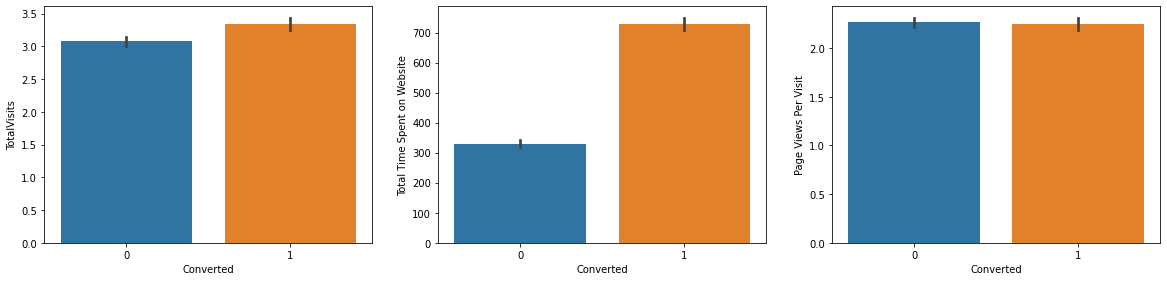

In [67]:

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='tab10', data = leads_final)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='tab10', data = leads_final)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='tab10', data = leads_final)
plt.show()


<b><font size= 3>Inference</font></b><br> 
there is a hiegh conversion rate for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Now, we will proceed with the data preparation step

# <b><font color= blue size =4>Step 4: Data Preparation</font></b>

<b><font color= maroon size =3>4.1 Converting some binary variables (Yes/No) to 0/1</font></b>

In [68]:
#Create a function to convert yes to 1 and No to 0
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


In [69]:
#lets put do not email into function

var =  ['Do Not Email']

leads_final[var] = leads_final[var].apply(binary_map)

In [70]:
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [71]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 898.1+ KB


<b><font color= maroon size =3>4.2 Lets create dummy Variable for some categorical columns:</font></b>

In [72]:
#getting a list of categorical columns 

cat_cols= leads_final.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [73]:
#getting dummies and dropping the first column and adding the results to the master dataframe
df_dummy = pd.get_dummies(leads_final[['Lead Origin']], drop_first=True)
leads_final= pd.concat([leads_final,df_dummy],1)



df_dummy = pd.get_dummies(leads_final['Lead Source'], prefix  = 'Lead Source')
df_dummy = df_dummy.drop(['Lead Source_Others'], 1)
leads_final = pd.concat([leads_final, df_dummy], axis = 1)


df_dummy = pd.get_dummies(leads_final['What is your current occupation'], prefix  = 'What is your current occupation')
df_dummy = df_dummy.drop(['What is your current occupation_Not provided'], 1)
leads_final = pd.concat([leads_final, df_dummy], axis = 1)



In [74]:
#dropping the original columns after dummy variable creation

leads_final.drop(cat_cols,1,inplace = True)

In [75]:
#checking dataset
leads_final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# <b><font color= blue size =4>Step 5: Test-Train Split</font></b>

In [76]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [77]:
# Putting feature variable to X and removing the Converted
X=leads_final.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [78]:
# Putting response variable to y
y = leads_final['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# <b><font color= blue size =4>Step 6: Feature Scaling</font></b>

In [80]:

from sklearn.preprocessing import StandardScaler

In [81]:
#scaling of features
scaler = StandardScaler()

num_columns=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])



In [82]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
## Checking the conversion rate from 'converted'

(sum(y)/len(y.index))*100

38.02043282434362

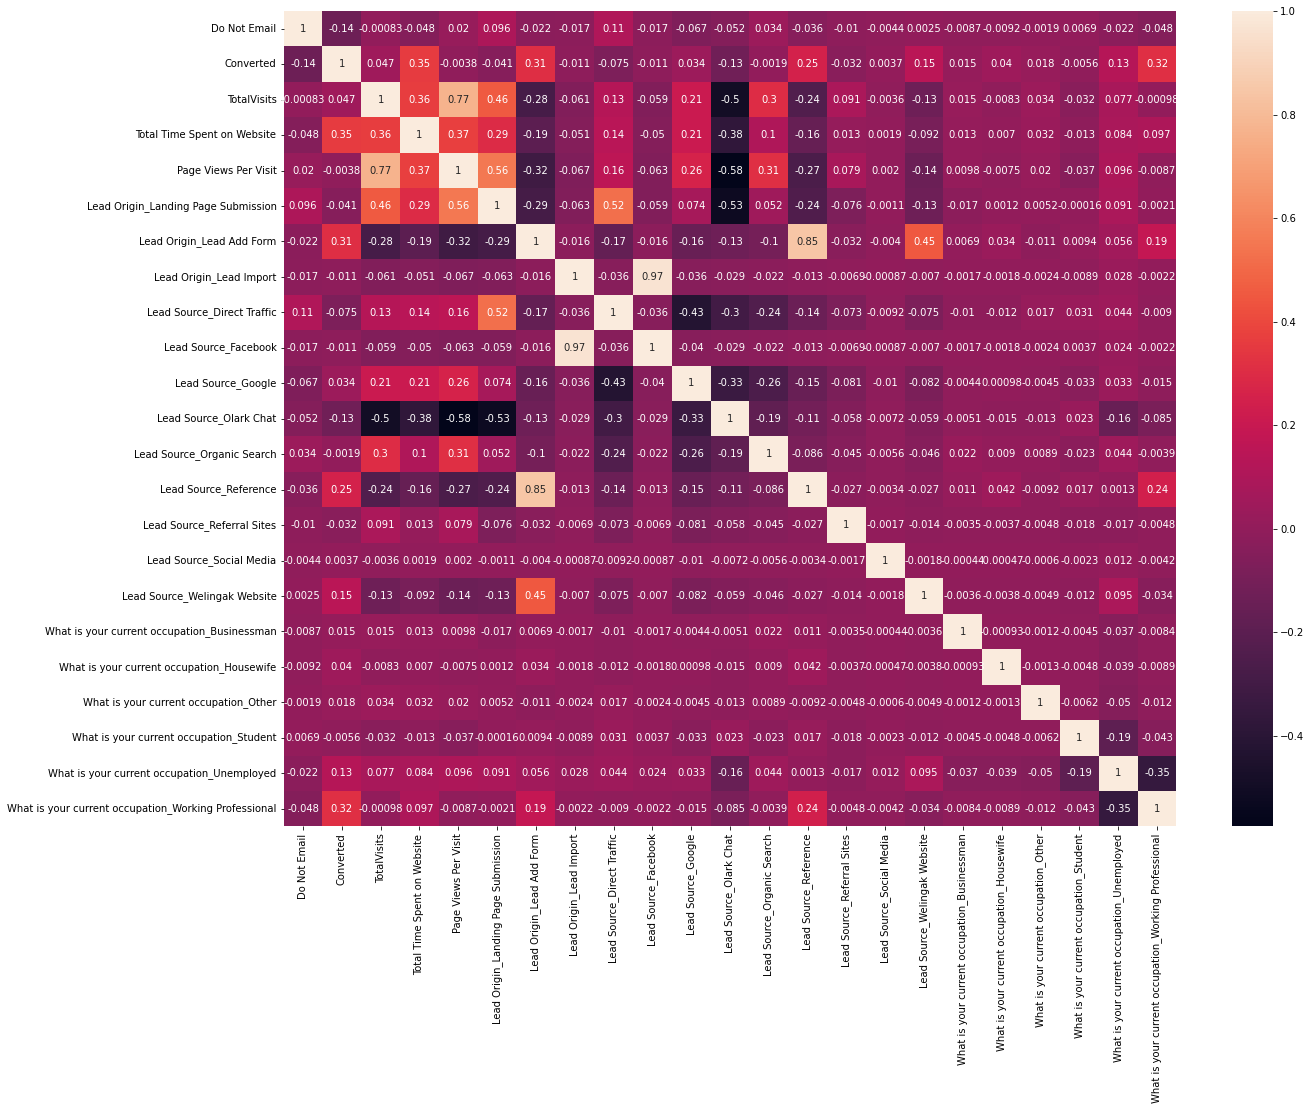

In [84]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(leads_final.corr(),annot = True)
plt.show()


<b><font color= maroon size =3>Dropping highly correlated df_dummy variables</font><b>

In [85]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

# <b><font color= blue size =4>Step 7: Building the Model by using RFE and Stats</font></b>

In [86]:
# importing necessary library
import statsmodels.api as sm

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [90]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media'],
      dtype='object')

<b><font color= green size =3>Lets begin with Model 1</font></b>

In [92]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
resm = logm1.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.9
Date:                Mon, 27 Feb 2023   Deviance:                       5723.8
Time:                        10:45:45   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0577      0.085    -24.265      0.000      -2.224      -1.891
Do Not Email                                            -0.3572      0.043     -8.336      0.000      -0.441      -0.273
Total Time Spent on Website                              1.1046      0.039     28.633      0.000       1.029       1.180
Lead Origin_Lead Add Form                                3.7140      0.222     16.744      0.000       3.279       4.149
Lead Origin_Lead Import                                  0.7644      1.565      0.488      0.625      -2.303       3.832
Lead Source_Direct Traffic                              -0.2445      0.079     -3.091      0.002      -0.400      -0.089
Lead Source_Facebook                                     0.1031      1.564      0.066      0.947      -2.963       3.169
Lead Source_Olark Chat                                   0.8357      0.100      8.360      0.000       0.640       1.032
Lead Source_Referral Sites                              -0.5552      0.329     -1.687      0.092      -1.200       0.090
Lead Source_Welingak Website                             1.9919      0.749      2.659      0.008       0.524       3.460
What is your current occupation_Businessman              1.4808      1.004      1.475      0.140      -0.486       3.448
What is your current occupation_Housewife               23.8534    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3491      0.639      2.112      0.035       0.097       2.601
What is your current occupation_Student                  1.1841      0.225      5.258      0.000       0.743       1.625
What is your current occupation_Unemployed               1.3085      0.084     15.652      0.000       1.145       1.472
What is your current occupation_Working Professional     3.8033      0.189     20.082      0.000       3.432       4.174
========================================================================================================================
"""

#### We can drop the hieghest p-value variable i.e.What is your current occupation_Housewife

In [93]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

<b><font color= green size =3>Next we go with Model 2</font></b>

In [94]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
resm = logm2.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.4
Date:                Mon, 27 Feb 2023   Deviance:                       5742.8
Time:                        10:45:45   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0294      0.084    -24.152      0.000      -2.194      -1.865
Do Not Email                                            -0.3585      0.043     -8.370      0.000      -0.442      -0.275
Total Time Spent on Website                              1.1043      0.039     28.676      0.000       1.029       1.180
Lead Origin_Lead Add Form                                3.7248      0.222     16.791      0.000       3.290       4.160
Lead Origin_Lead Import                                  0.7627      1.564      0.488      0.626      -2.304       3.829
Lead Source_Direct Traffic                              -0.2482      0.079     -3.143      0.002      -0.403      -0.093
Lead Source_Facebook                                     0.1005      1.564      0.064      0.949      -2.965       3.166
Lead Source_Olark Chat                                   0.8243      0.100      8.262      0.000       0.629       1.020
Lead Source_Referral Sites                              -0.5641      0.329     -1.716      0.086      -1.209       0.080
Lead Source_Welingak Website                             1.9794      0.749      2.642      0.008       0.511       3.448
What is your current occupation_Businessman              1.4546      1.004      1.449      0.147      -0.514       3.423
What is your current occupation_Other                    1.3240      0.639      2.073      0.038       0.072       2.576
What is your current occupation_Student                  1.1595      0.225      5.152      0.000       0.718       1.601
What is your current occupation_Unemployed               1.2828      0.083     15.468      0.000       1.120       1.445
What is your current occupation_Working Professional     3.7775      0.189     19.977      0.000       3.407       4.148
========================================================================================================================
"""

<b>We can drop "Lead Source_Welingak Website" because of high p-value

In [95]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

<b><font color= green size =3>Next is Model 3</font></b>

In [96]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
resm = logm3.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.1
Date:                Mon, 27 Feb 2023   Deviance:                       5754.2
Time:                        10:45:45   Pearson chi2:                 6.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0282      0.084    -24.147      0.000      -2.193      -1.864
Do Not Email                                            -0.3505      0.042     -8.321      0.000      -0.433      -0.268
Total Time Spent on Website                              1.1037      0.038     28.674      0.000       1.028       1.179
Lead Origin_Lead Add Form                                4.0784      0.212     19.196      0.000       3.662       4.495
Lead Origin_Lead Import                                  0.7567      1.566      0.483      0.629      -2.313       3.826
Lead Source_Direct Traffic                              -0.2488      0.079     -3.152      0.002      -0.404      -0.094
Lead Source_Facebook                                     0.1068      1.566      0.068      0.946      -2.962       3.175
Lead Source_Olark Chat                                   0.8241      0.100      8.262      0.000       0.629       1.020
Lead Source_Referral Sites                              -0.5638      0.329     -1.716      0.086      -1.208       0.080
What is your current occupation_Businessman              1.4295      1.017      1.405      0.160      -0.564       3.423
What is your current occupation_Other                    1.3230      0.639      2.071      0.038       0.071       2.575
What is your current occupation_Student                  1.1487      0.226      5.082      0.000       0.706       1.592
What is your current occupation_Unemployed               1.2839      0.083     15.482      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7674      0.189     19.911      0.000       3.397       4.138
========================================================================================================================
"""

In [97]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman',1)

<b><font color= green size =3>Lets build Model 4</font></b>

In [98]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.0
Date:                Mon, 27 Feb 2023   Deviance:                       5756.1
Time:                        10:45:45   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0217      0.084    -24.140      0.000      -2.186      -1.858
Do Not Email                                            -0.3510      0.042     -8.331      0.000      -0.434      -0.268
Total Time Spent on Website                              1.1036      0.038     28.680      0.000       1.028       1.179
Lead Origin_Lead Add Form                                4.0850      0.212     19.224      0.000       3.669       4.502
Lead Origin_Lead Import                                  0.7565      1.566      0.483      0.629      -2.313       3.826
Lead Source_Direct Traffic                              -0.2486      0.079     -3.150      0.002      -0.403      -0.094
Lead Source_Facebook                                     0.1067      1.566      0.068      0.946      -2.962       3.175
Lead Source_Olark Chat                                   0.8231      0.100      8.253      0.000       0.628       1.019
Lead Source_Referral Sites                              -0.5654      0.329     -1.721      0.085      -1.209       0.079
What is your current occupation_Other                    1.3167      0.639      2.062      0.039       0.065       2.568
What is your current occupation_Student                  1.1422      0.226      5.054      0.000       0.699       1.585
What is your current occupation_Unemployed               1.2773      0.083     15.449      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7608      0.189     19.888      0.000       3.390       4.131
========================================================================================================================
"""

In [99]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

<b><font color= green size =3>Model 5</font></b>

In [100]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.1
Date:                Mon, 27 Feb 2023   Deviance:                       5760.2
Time:                        10:45:45   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0069      0.083    -24.123      0.000      -2.170      -1.844
Do Not Email                                            -0.3500      0.042     -8.319      0.000      -0.432      -0.268
Total Time Spent on Website                              1.1055      0.038     28.728      0.000       1.030       1.181
Lead Origin_Lead Add Form                                4.0871      0.212     19.236      0.000       3.671       4.504
Lead Origin_Lead Import                                  0.7584      1.566      0.484      0.628      -2.312       3.829
Lead Source_Direct Traffic                              -0.2449      0.079     -3.105      0.002      -0.400      -0.090
Lead Source_Facebook                                     0.1070      1.566      0.068      0.946      -2.962       3.176
Lead Source_Olark Chat                                   0.8217      0.100      8.242      0.000       0.626       1.017
Lead Source_Referral Sites                              -0.5686      0.328     -1.731      0.083      -1.212       0.075
What is your current occupation_Student                  1.1266      0.226      4.989      0.000       0.684       1.569
What is your current occupation_Unemployed               1.2615      0.082     15.365      0.000       1.101       1.422
What is your current occupation_Working Professional     3.7451      0.189     19.831      0.000       3.375       4.115
========================================================================================================================
"""

In [101]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Import',1)

<b><font color= green size =3>Model 6</font></b>

In [102]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.2
Date:                Mon, 27 Feb 2023   Deviance:                       5760.4
Time:                        10:45:45   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0065      0.083    -24.122      0.000      -2.170      -1.843
Do Not Email                                            -0.3500      0.042     -8.320      0.000      -0.433      -0.268
Total Time Spent on Website                              1.1050      0.038     28.728      0.000       1.030       1.180
Lead Origin_Lead Add Form                                4.0864      0.212     19.234      0.000       3.670       4.503
Lead Source_Direct Traffic                              -0.2451      0.079     -3.108      0.002      -0.400      -0.091
Lead Source_Facebook                                     0.8312      0.442      1.880      0.060      -0.035       1.697
Lead Source_Olark Chat                                   0.8211      0.100      8.237      0.000       0.626       1.016
Lead Source_Referral Sites                              -0.5691      0.328     -1.732      0.083      -1.213       0.075
What is your current occupation_Student                  1.1188      0.225      4.965      0.000       0.677       1.561
What is your current occupation_Unemployed               1.2618      0.082     15.370      0.000       1.101       1.423
What is your current occupation_Working Professional     3.7452      0.189     19.832      0.000       3.375       4.115
========================================================================================================================
"""

<b><font color = maroon>Since the Model 6 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

<b><font color= green size =3>Calculating vif</font></b>

In [103]:
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective vif
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col].columns
vif_df['vif'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
vif_df

,Features,vif
8,What is your current occupation_Unemployed,1.61
3,Lead Source_Direct Traffic,1.38
5,Lead Source_Olark Chat,1.33
1,Total Time Spent on Website,1.29
2,Lead Origin_Lead Add Form,1.28
9,What is your current occupation_Working Profes...,1.16
7,What is your current occupation_Student,1.03
0,Do Not Email,1.02
4,Lead Source_Facebook,1.02
6,Lead Source_Referral Sites,1.01


<b>Each value of VIF is good for further proceding for making further predictions using this model

## <font color =maroon>Predicting a Train model</font>

In [104]:
y_train_df = res.predict(X_train_sm)
y_train_df[:10]

7962    0.729005
5520    0.149440
1962    0.218732
1566    0.967130
9170    0.311244
5097    0.113437
8954    0.254147
309     0.253003
5519    0.113437
1050    0.643486
dtype: float64

In [105]:
y_train_df_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probility':y_train_df})
y_train_df_final['ID'] = y_train.index
y_train_df_final.head()

,Converted,Converted_probility,ID
7962,0,0.729005,7962
5520,0,0.149440,5520
1962,0,0.218732,1962
1566,1,0.967130,1566
9170,0,0.311244,9170


#####We have takey probability as one when the converted probability is greater then 0.5

In [106]:
y_train_df_final['Predicted'] = y_train_df_final.Converted_probility.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_df_final.head()

,Converted,Converted_probility,ID,Predicted
7962,0,0.729005,7962,1
5520,0,0.149440,5520,0
1962,0,0.218732,1962,0
1566,1,0.967130,1566,1
9170,0,0.311244,9170,0


In [107]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_df_final.Converted, y_train_df_final.Predicted )
print(confusion)

[[3550  403]
 [ 851 1568]]


In [108]:
# for checking the Accuracy
print(metrics.accuracy_score(y_train_df_final.Converted, y_train_df_final.Predicted))

0.803201506591337


In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
#True Positive
TP / float(TP+FN)

0.6482017362546507

In [111]:
#True Negative
TN / float(TN+FP)

0.8980521123197571

In [112]:
# Calculate False Postive 
print(FP/ float(TN+FP))

0.10194788768024285


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.7955352612886859


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8066348557146104


### <font color = maroon>PLOTTING ROC CURVE

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_df_final.Converted, y_train_df_final.Converted_probility, drop_intermediate = False )


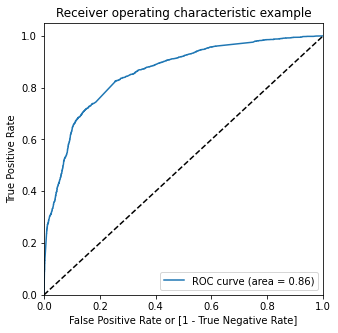

In [117]:
draw_roc(y_train_df_final.Converted, y_train_df_final.Converted_probility)

<B>The ROC Curve should be a value close to 1. We are getting a good value of 0.85 indicating a good predictive model.</B>

### <font color = maroon>Lets find out an Optimal Cutoff Point

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df_final[i]= y_train_df_final.Converted_probility.map(lambda x: 1 if x > i else 0)
y_train_df_final.head()

,Converted,Converted_probility,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.729005,7962,1,1,1,1,1,1,1,1,1,0,0
5520,0,0.149440,5520,0,1,1,0,0,0,0,0,0,0,0
1962,0,0.218732,1962,0,1,1,1,0,0,0,0,0,0,0
1566,1,0.967130,1566,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.311244,9170,0,1,1,1,1,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
df_cutoff = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df_final.Converted, y_train_df_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(df_cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.379630     1.000000     0.000000
0.1          0.1  0.515537     0.981811     0.230205
0.2          0.2  0.691149     0.906160     0.559575
0.3          0.3  0.771030     0.828442     0.735897
0.4          0.4  0.801632     0.700289     0.863648
0.5          0.5  0.803202     0.648202     0.898052
0.6          0.6  0.781858     0.563456     0.915507
0.7          0.7  0.759416     0.468789     0.937263
0.8          0.8  0.731952     0.348905     0.966355
0.9          0.9  0.709510     0.251344     0.989881


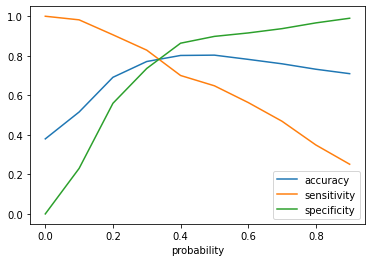

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
df_cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [121]:
y_train_df_final['final_Predicted'] = y_train_df_final.Converted_probility.map( lambda x: 1 if x > 0.3 else 0)

y_train_df_final.head()

,Converted,Converted_probility,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
7962,0,0.729005,7962,1,1,1,1,1,1,1,1,1,0,0,1
5520,0,0.149440,5520,0,1,1,0,0,0,0,0,0,0,0,0
1962,0,0.218732,1962,0,1,1,1,0,0,0,0,0,0,0,0
1566,1,0.967130,1566,1,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.311244,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [122]:
y_train_df_final['Lead_Score'] = y_train_df_final.Converted_probility.map( lambda x: round(x*100))

y_train_df_final[['Converted','Converted_probility','ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_probility,ID,final_Predicted,Lead_Score
7962,0,0.729005,7962,1,73
5520,0,0.149440,5520,0,15
1962,0,0.218732,1962,0,22
1566,1,0.967130,1566,1,97
9170,0,0.311244,9170,1,31


In [123]:
# get the total of final predicted conversion / non conversion counts from the actual converted rates
# checking if 80% cases are correctly predicted based on the converted column.
checking_df = y_train_df_final.loc[y_train_df_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2004
0     415
Name: final_Predicted, dtype: int64

In [124]:
# check the precentage of final_predicted conversions

2894/float(2894+606)

0.8268571428571428

In [125]:
r=X_train[col]

### <font color = maroon>Hence, we can see that the final prediction of conversions have a target of 82% conversion. Hence, we can say that this is a good model.

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [126]:
#Accureacy
metrics.accuracy_score(y_train_df_final.Converted, y_train_df_final.final_Predicted)

0.7710295040803515

In [127]:
confusion_2 = metrics.confusion_matrix(y_train_df_final.Converted, y_train_df_final.final_Predicted )
confusion_2

array([[2909, 1044],
       [ 415, 2004]])

In [128]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [129]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8284415047540306

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.7358967872501897

<b><font size=3>Inference:</font></b><br>
So the above model seems to work correctly. And the ROC curve value is 0.86. We have the following values for the Train Data:
<ul>
    <li>Accuracy : 77.10%</li>
    <li>Sensitivity :82.84%</li>
    <li>Specificity : 73.58%</li></ul>
    


In [131]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.26410321274981025


In [132]:
# Positive predictive value 
print (TP / float(TP+FP))

0.65748031496063


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8751504211793021


<b><font color= green size =3>Precision and Recall</font></b>

In [134]:
#Looking at the confusion matrix again

confusion_1 = metrics.confusion_matrix(y_train_df_final.Converted, y_train_df_final.final_Predicted )
confusion_1

array([[2909, 1044],
       [ 415, 2004]])

In [135]:
##### Precision
TP / TP + FP

confusion_1[1,1]/(confusion_1[0,1]+confusion_1[1,1])

0.65748031496063

In [136]:
##### Recall
TP / TP + FN

confusion_1[1,1]/(confusion_1[1,0]+confusion_1[1,1])

0.8284415047540306

<b><font color= green size =3>Precision and Recall Trade-off</font></b>

In [137]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [138]:
# Creating precision recall curve
y_train_df_final.Converted, y_train_df_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_df_final.Converted, y_train_df_final.Converted_probility)

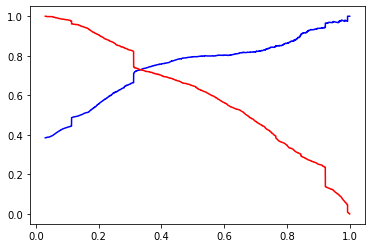

In [139]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color =maroon>Lets do Predictions on  the test set

In [140]:


num_columns=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_columns] = scaler.fit_transform(X_test[num_columns])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [141]:
r=X_train[col]

In [142]:
X_test = r
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,1.476324,0,0,0,0,0,0,1,0
5520,-0.294015,-0.771066,0,1,0,0,0,0,1,0
1962,-0.294015,-0.571257,0,0,0,0,0,0,1,0
1566,-0.294015,1.393834,0,0,0,0,0,0,0,1
9170,-0.294015,-0.881052,0,0,0,1,0,0,1,0


In [143]:
#Add constant
X_test_sm = sm.add_constant(X_test)


In [144]:
X_test_sm.shape

(6372, 11)

In [145]:
y_test_pred = res.predict(X_test_sm)    

In [146]:
y_test_pred[:10]

7962    0.729005
5520    0.149440
1962    0.218732
1566    0.967130
9170    0.311244
5097    0.113437
8954    0.254147
309     0.253003
5519    0.113437
1050    0.643486
dtype: float64

In [147]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head
y_pred_1.head()

,0
7962,0.729005
5520,0.149440
1962,0.218732
1566,0.967130
9170,0.311244


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final=y_pred_final[~np.isnan(y_pred_final).any(axis=1)]

In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [155]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0.0,3504.0,0.729005
1,1.0,4050.0,0.149440
2,0.0,7201.0,0.218732
3,0.0,1196.0,0.967130
4,1.0,8219.0,0.311244


#### <font color = green>lets assign the Lead Score

In [156]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [157]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504.0,0.0,0.729005,73
1,4050.0,1.0,0.149440,15
2,7201.0,0.0,0.218732,22
3,1196.0,0.0,0.967130,97
4,8219.0,1.0,0.311244,31


In [158]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.75 else 0)

In [159]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504.0,0.0,0.729005,73,0
1,4050.0,1.0,0.149440,15,0
2,7201.0,0.0,0.218732,22,0
3,1196.0,0.0,0.967130,97,1
4,8219.0,1.0,0.311244,31,0


In [160]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts fro  m the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

0    833
1    209
Name: final_Predicted, dtype: int64

In [161]:
# check the precentage of final_predicted conversions on test data

833/float(800+209)

0.8255698711595639

### <font color = purple>Hence we can see that the final prediction of conversions have a target rate of 82.55%  (same as predictions made on training data set)

###<font color = Red>Lets figure out which leads need to be get in touch

The customer whose leads are greter then 80 % are below

In [162]:
Good_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
Good_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
3,1196.0,0.0,0.967130,97,1
28,4486.0,0.0,0.947326,95,1
34,6387.0,0.0,0.995366,100,1
67,1902.0,0.0,0.922082,92,1
84,4096.0,0.0,0.831353,83,1
...,...,...,...,...,...
2700,2341.0,1.0,0.992997,99,1
2706,4891.0,1.0,0.992997,99,1
2714,6888.0,0.0,0.861301,86,1
2717,6163.0,1.0,0.944890,94,1


In [163]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               4.086387
What is your current occupation_Working Professional    3.745151
What is your current occupation_Unemployed              1.261790
What is your current occupation_Student                 1.118831
Total Time Spent on Website                             1.105036
Lead Source_Facebook                                    0.831152
Lead Source_Olark Chat                                  0.821096
Lead Source_Direct Traffic                             -0.245136
Do Not Email                                           -0.350045
Lead Source_Referral Sites                             -0.569072
const                                                  -2.006521
dtype: float64

#####The top prospect id that should be contacted are below...

In [167]:
good_leads_ids = Good_leads["Prospect ID"].values.reshape(-1)
good_leads_ids

array([1.196e+03, 4.486e+03, 6.387e+03, 1.902e+03, 4.096e+03, 1.030e+03,
       8.269e+03, 6.691e+03, 1.525e+03, 6.780e+02, 2.023e+03, 4.564e+03,
       2.480e+03, 2.666e+03, 5.860e+03, 1.883e+03, 7.003e+03, 8.469e+03,
       7.030e+03, 2.719e+03, 5.070e+03, 3.882e+03, 3.213e+03, 6.727e+03,
       5.258e+03, 4.173e+03, 7.734e+03, 5.841e+03, 2.664e+03, 5.120e+02,
       3.799e+03, 2.485e+03, 7.850e+02, 2.372e+03, 5.502e+03, 3.686e+03,
       5.619e+03, 7.300e+01, 3.523e+03, 1.291e+03, 6.349e+03, 4.278e+03,
       7.470e+02, 2.110e+02, 9.062e+03, 4.250e+03, 2.460e+03, 6.956e+03,
       8.172e+03, 3.255e+03, 2.908e+03, 6.781e+03, 6.272e+03, 8.915e+03,
       2.321e+03, 8.259e+03, 1.307e+03, 1.074e+03, 8.780e+02, 8.965e+03,
       9.174e+03, 6.860e+02, 6.840e+02, 4.992e+03, 6.479e+03, 4.318e+03,
       2.375e+03, 8.268e+03, 3.050e+02, 8.615e+03, 8.665e+03, 7.152e+03,
       5.964e+03, 4.730e+03, 4.662e+03, 4.530e+03, 7.883e+03, 1.798e+03,
       3.270e+02, 8.519e+03, 2.784e+03, 3.187e+03, 

####Conclusion
<b>Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :</b>
<li>Lead Origin_Lead Add Form</li>
<li>What is your current occupation_Working Professional</li>
<li>Total Time Spent on Website	</li>

<b>Recomendations:</b>
- The lead from "Lead Origin_Lead Add Form" is more likely to convert. Hence company should make a call to this lead.
- The lead from "What is your current occupation_Working Professional" is more likely to convert. Hence company should make a call to this lead.
- The lead from "What is your current occupation_Unemployed " is more likely to convert. Hence company should make a call to this lead.
- The lead from "What is your current occupation_Student " is more likely to convert. Hence company should make a call to this lead.
- The lead from "Lead Source_Facebook " is not more likely to convert. Hence company should not make a call to this lead.
- The lead from "Lead Source_Olark Chat" is not more likely to convert. Hence company should not make a call to this lead.
- The lead from "Lead Source_Direct Traffic " is  not more likely to convert. Hence company should not make a call to this lead.
- The lead from "Do Not Email" is not more likely to convert. Hence company should not make a call to this lead.
- The lead from "Lead Source_Referral Sites" is not more likely to convert. Hence company should not make a call to this lead.
- The lead from "const" is not more likely to convert. Hence company should not make a call to this lead.